In [1]:
import tensorflow as tf
import sys
import numpy as np

In [2]:
## Sequential model

model_seq = tf.keras.Sequential(name= 'sequential model')
model_seq.add(tf.keras.Input(shape = (32,), name = 'inputs'))
model_seq.add(tf.keras.layers.Dense(64, activation='relu', name = 'hidden1'))
model_seq.add(tf.keras.layers.Dense(32, activation='relu', name= 'hidden2'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax', name= 'output'))

model_seq.summary()

Model: "sequential model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                2112      
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [3]:
## Functional model

inputs = tf.keras.layers.Input(shape = (32,))
dense1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
dense2 = tf.keras.layers.Dense(32, activation='relu')(dense1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dense2)

model_fun = tf.keras.Model(inputs = inputs, outputs = outputs)

model_fun.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [4]:
## subclassing model

class mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name = 'mymodel')
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu', name= 'hidden1')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x
    
Mymodel = mymodel(64, 32, 10)

In [5]:
Mymodel.build(input_shape=(1,32))

Mymodel.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             multiple                  2112      
                                                                 
 dense_3 (Dense)             multiple                  2080      
                                                                 
 dense_4 (Dense)             multiple                  330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [6]:
class model_sub(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(model_sub, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='softmax')
        
    def call(self, inputs):
        x = self.dense2(inputs)
        x = self.dense1(x)
        x = self.dense3(x)
        
        return x
    
Model_subclassing = model_sub(64,32,10)

In [7]:
# Model_subclassing.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')

# Model_subclassing.fit(x_train, y_train, epochs=5, batch_size=24, callbacks=[checkpoint, early_stopping])

In [8]:
Model_subclassing.build(input_shape=(1,64))

Model_subclassing.summary()

Model: "model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             multiple                  2112      
                                                                 
 dense_6 (Dense)             multiple                  2080      
                                                                 
 dense_7 (Dense)             multiple                  650       
                                                                 
Total params: 4,842
Trainable params: 4,842
Non-trainable params: 0
_________________________________________________________________


In [9]:
dataset = np.loadtxt('./pima-indians-diabetes.csv', delimiter=',')
dataset.shape

X = dataset[:,:-1]
y = dataset[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# X_train.shape

class mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x
    
model_indian = mymodel(12, 8, 1)

In [12]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './best_model.h5',
                                                verbose=1,
                                               save_best_only=True,
                                               save_weights_only=True)
earlystop = tf.keras.callbacks.EarlyStopping(patience=5)

In [13]:
model_indian.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

history = model_indian.fit(X_train, y_train,validation_data= (X_test, y_test), epochs=100, batch_size=24, callbacks=[checkpoint, earlystop])

Epoch 1/100
23/26 [=========================>....] - ETA: 0s - loss: 11.6610 - acc: 0.5942 
Epoch 1: val_loss improved from inf to 9.19122, saving model to .\best_model.h5
26/26 [==============================] - 2s 17ms/step - loss: 11.3921 - acc: 0.5961 - val_loss: 9.1912 - val_acc: 0.6429
Epoch 2/100
16/26 [=================>............] - ETA: 0s - loss: 8.3403 - acc: 0.5938
Epoch 2: val_loss improved from 9.19122 to 5.20960, saving model to .\best_model.h5
26/26 [==============================] - 0s 6ms/step - loss: 7.5563 - acc: 0.6059 - val_loss: 5.2096 - val_acc: 0.6494
Epoch 3/100
18/26 [===================>..........] - ETA: 0s - loss: 4.5197 - acc: 0.6111
Epoch 3: val_loss improved from 5.20960 to 2.28535, saving model to .\best_model.h5
26/26 [==============================] - 0s 7ms/step - loss: 4.1357 - acc: 0.6075 - val_loss: 2.2854 - val_acc: 0.6558
Epoch 4/100
17/26 [==================>...........] - ETA: 0s - loss: 2.3135 - acc: 0.6201
Epoch 4: val_loss improved from

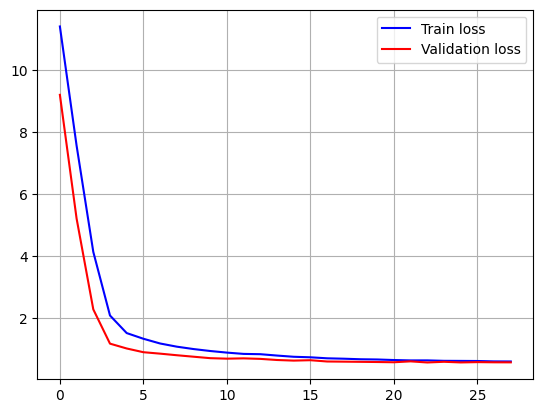

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation loss')
plt.grid()
plt.legend()
plt.show()

In [15]:
model_indian.load_weights('./best_model.h5')

In [16]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

# print(samples)
target =[[1],[0],[1],[1],[0],[1]]

In [17]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

In [18]:
display(samples)
display(sequences)
print(tokenizer.word_index)

['너 오늘 이뻐 보인다',
 '나는 오늘 기분이 더러워',
 '끝내주는데, 좋은 일이 있나봐',
 '나 좋은 일이 생겼어',
 '아 오늘 진짜 짜증나',
 '환상적인데, 정말 좋은거 같아']

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [19]:
labels = np.array(target)
labels

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [20]:
batch_size = 2
epochs = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) +1

emb_size = 128
hidden_dim = 256
output_dim = 1

In [21]:
## Sequential API
model_seq = tf.keras.Sequential(name = 'Sequential')
model_seq.add(tf.keras.layers.Input(shape = (4,)))
model_seq.add(tf.keras.layers.Embedding(vocab_size, emb_size))
model_seq.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model_seq.add(tf.keras.layers.Dense(hidden_dim, activation='relu'))
model_seq.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))


# model_seq = tf.keras.Sequential(
# [tf.keras.layers.Input(shape = (4,)),
#  tf.keras.layers.Embedding(vocab_size, emb_size),
#  tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
#  tf.keras.layers.Dense(hidden_dim, activation='relu'),
#  tf.keras.layers.Dense(output_dim, activation='sigmoid')])

model_seq.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 128)            2688      
                                                                 
 lambda (Lambda)             (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_seq.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics='acc')
model_seq.fit(sequences, target, epochs=epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.6939 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6742 - acc: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6595 - acc: 0.8333
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6443 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6257 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6038 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5834 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5535 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5212 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4843 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4418 

3/3 [==============================] - 0s 4ms/step - loss: 7.2255e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 5ms/step - loss: 7.0521e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 5ms/step - loss: 6.8855e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 6.7161e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 5ms/step - loss: 6.5615e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 5ms/step - loss: 6.4162e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 5ms/step - loss: 6.2705e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 5ms/step - loss: 6.1188e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/step - loss: 5.9902e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 5ms/step - loss: 5.8561e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

In [23]:
inputs = tf.keras.layers.Input(shape = (4,))
emb_out = tf.keras.layers.Embedding(vocab_size, 200)(inputs)
mean_out =tf.reduce_mean(emb_out, axis=1)
hidden1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(mean_out)
outputs = tf.keras.layers.Dense(output_dim, activation='sigmoid')(hidden1)

model_fun1 = tf.keras.Model(inputs = inputs, outputs = outputs)

model_fun1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 4, 200)            4200      
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 200)              0         
 mbda)                                                           
                                                                 
 dense_13 (Dense)            (None, 256)               51456     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 55,913
Trainable params: 55,913
Non-trainable params: 0
_______________________________________________________

In [24]:
class model_sub(tf.keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs):
        super(model_sub, self).__init__()
        self.emb = tf.keras.layers.Embedding(vocab_size,emb_size)
        self.hidden = tf.keras.layers.Dense(hidden, activation='relu')
        self.outputs = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        x = self.emb(inputs)
        x = tf.reduce_mean(x,axis=1)
        x = self.hidden(x)
        x = self.outputs(x)
        
        return x
    
Model_sub = model_sub(vocab_size,emb_size, hidden_dim, output_dim)

In [25]:
Model_sub.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics='acc')
Model_sub.fit(sequences, target, epochs=epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.6921 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6723 - acc: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6549 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6380 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6208 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5967 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5717 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5436 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5074 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4688 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4249 

3/3 [==============================] - 0s 5ms/step - loss: 7.5601e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 4ms/step - loss: 7.4001e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 3ms/step - loss: 7.2151e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 7.0321e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 6.8976e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 6.7478e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 4ms/step - loss: 6.5846e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 4ms/step - loss: 6.4564e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/step - loss: 6.3153e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 5ms/step - loss: 6.1689e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

In [26]:
import sklearn

print(sklearn.__version__)

1.2.2


In [27]:
from sklearn.datasets import load_iris
import pandas as pd

In [28]:
iris_data = load_iris()
print(type(iris_data))

iris_data.keys()

<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
print(iris_data['data'])
print(iris_data['target'])
print(iris_data['feature_names'])
print(iris_data['target_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
iris = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris['class'] = iris_data['target']

In [31]:
setosa = iris[iris['class']==0]
versicolor = iris[iris['class']==1]
virginica = iris[iris['class']==2]

In [32]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


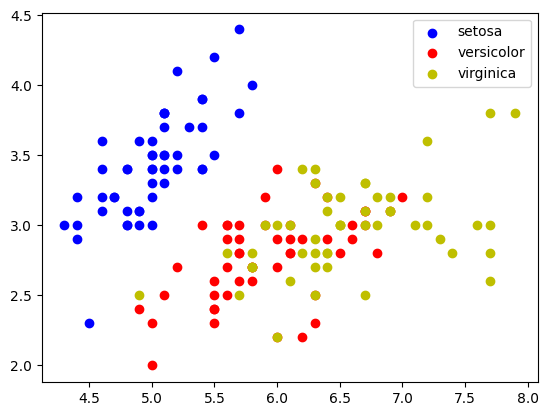

In [33]:
import matplotlib.pyplot as plt
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker='o', color ='b', label='setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker='o', color ='r', label='versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], marker='o', color ='y', label='virginica')

plt.legend()
plt.show()

In [34]:
# knn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size=0.2)

In [36]:
##
ss = StandardScaler()
ss.fit(X_train)
Train_scaled = ss.transform(X_train)
Test_scaled = ss.transform(X_test)

In [37]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': range(1,10)}
gs_knn = GridSearchCV(estimator = knn,
                     param_grid = param_knn,
                     scoring = 'accuracy', cv = 5, n_jobs=-1)
gs_knn.fit(Train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [38]:
print(gs_knn.best_estimator_)
print(gs_knn.best_score_)

KNeighborsClassifier()
0.975


In [39]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(Train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)